# Vehicle Price Regression

For this capstone project, I have chosen a dataset of sold vehicles in the last 12 months from a local car dealership.
The dataset contains 2174 sold vehicles, each with several feature types, including; float, integer, and categorical. A regression model would be built to estimate a vehicle's sale price. This model can assist the dealership properly price their vehicles in active inventory.

Features in the data as follows;

Red/Black - Number of vehicles not appraised or booked out through the software

Carfax Has Report -  vehicle has a carfax report generated

Carfax Has Manufacturer Recall - indicates if there is an OEM recall on the vehicle

Carfax Has Warnings - There is an alert on the vehicle report

Carfax Has Problems - vehicle has had major issues reported

Photos - vehicle has marketing photos 

Year - Model year of the vehicle

Vehicle - Model and trim/series of the vehicle

VIN - Vehicle identification number

Class - Vehicle body classification                        

Class_type - subcategories of the vehicle class              

Certified - certified pre-owned vehicle               

Deleted Date  - sold date of vehicle                 

Status - if the vehicle was added via an appraisal or through the Dealer Management System                 

Recall Status  - if the vehicle has an open or closed recall                

Age - Vehicle Days in inventory                         

Body - number of vehicle doors and class                            

Color - vehicle color                       

Disp - Vehicle disposition                            

Price - Price vehicle was sold for                             

Book  - vehicle book value depending on price guide selected                           

Cost  - amount dealership paid for the vehicle                          

Odometer  - the odometer reading when vehicle was sold                       

Overall -    available supply of similarly configured vehicles                  

Like Mine - Days to sell vehicles like mine based on the market
 


In [342]:
# First, lets load Helpful Packages
import pandas as pd
import numpy as np
import numpy as np # for linear algebra
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [343]:
excel_file = 'Deleted_report.xls'
data_original = pd.read_excel(excel_file)
data = pd.read_excel(excel_file)
data.head()

,Red/Black,Carfax Has Report,Carfax Has Manufacturer Recall,Carfax Has Warnings,Carfax Has Problems,Photos,Year,Vehicle,VIN,Class,...,Age,Body,Color,Disp,Price,Book,Cost,Odometer,Overall,Like Mine
0,NaN,NaN,NaN,NaN,NaN,NaN,2018,Mercedes-Benz GLS 450 4MATIC®,4JGDF6EE8JB069995,SUV,...,1,4D Sport Utility,Obsidian Black,Retail,76164.0,NaN,76514.0,45.0,NaN,NaN
1,NaN,Yes,NaN,NaN,NaN,NaN,2015,Mercedes-Benz C-Class C 300 4MATIC®,55SWF4KB3FU048731,Car,...,1,4D Sedan,Polar White,Retail,NaN,17874.0,NaN,47525.0,35.0,33.0
2,NaN,NaN,NaN,NaN,NaN,NaN,2018,Mercedes-Benz S-Class S 450 4MATIC®,WDDUG6EB9JA374697,Car,...,1,4D Sedan,Gray Metallic,Retail,116148.0,NaN,NaN,42.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,2017,Mercedes-Benz Sprinter 3500,WD3PF4CC4HP376370,Van,...,1,3D Cargo Van,Arctic White,Retail,49526.0,39546.0,NaN,5.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2014,Mercedes-Benz M-Class ML 350 4MATIC®,4JGDA5HB9EA347406,SUV,...,1,4D Sport Utility,Brown,Retail,25117.0,NaN,NaN,45642.0,NaN,NaN


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
Red/Black                         0 non-null float64
Carfax Has
Report                 326 non-null object
Carfax Has
Manufacturer
Recall    17 non-null object
Carfax Has
Warnings               36 non-null object
Carfax Has
Problems               36 non-null object
Photos                            120 non-null float64
Year                              2174 non-null int64
Vehicle                           2174 non-null object
VIN                               2174 non-null object
Class                             2171 non-null object
Class_type                        2171 non-null object
Certified                         582 non-null object
Deleted Date                      2174 non-null datetime64[ns]
Status                            0 non-null float64
Recall Status                     267 non-null object
Age                               2174 non-null int64
Body                

As we can see, there are quite a number of missing values in the dataset

In [345]:
data.describe()

,Red/Black,Photos,Year,Status,Age,Price,Book,Cost,Odometer,Overall,Like Mine
count,0.0,120.000000,2174.000000,0.0,2174.000000,1879.000000,1536.000000,2009.000000,2136.000000,1385.000000,1275.000000
mean,NaN,37.741667,2015.756670,NaN,44.999540,47652.657265,29401.794271,41691.962668,25193.669944,75.168231,75.105882
std,NaN,1.803339,3.463057,NaN,48.331703,21481.115158,17054.939781,23689.764625,37088.196311,30.386715,44.660614
min,NaN,33.000000,1992.000000,NaN,1.000000,1302.000000,332.000000,-775.000000,3.000000,16.000000,16.000000
25%,NaN,37.000000,2015.000000,NaN,13.000000,32829.000000,19020.500000,27620.000000,13.000000,55.000000,47.000000
50%,NaN,38.000000,2017.000000,NaN,30.000000,44995.000000,28055.000000,42340.000000,6767.500000,70.000000,65.000000
75%,NaN,39.000000,2018.000000,NaN,60.000000,57603.000000,38835.000000,54578.000000,36021.750000,87.000000,90.000000
max,NaN,42.000000,2019.000000,NaN,503.000000,203000.000000,118469.000000,205250.000000,263738.000000,330.000000,653.000000


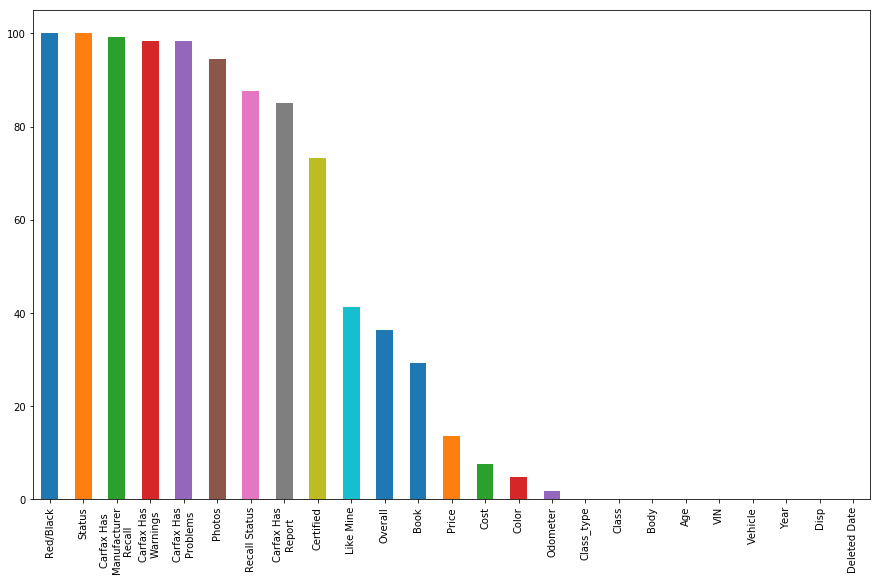

In [346]:
g = data.isnull().sum().sort_values(ascending=False)/len(data)*100
plt.figure(figsize=(15, 9))
g.plot(kind='bar')

About 9 columns are missing aroung 50% of their values. Some of the columns have features that allow the dealership manage their inventory against other dealerships in the area and therefore is not correlated with pricing the vehicle.

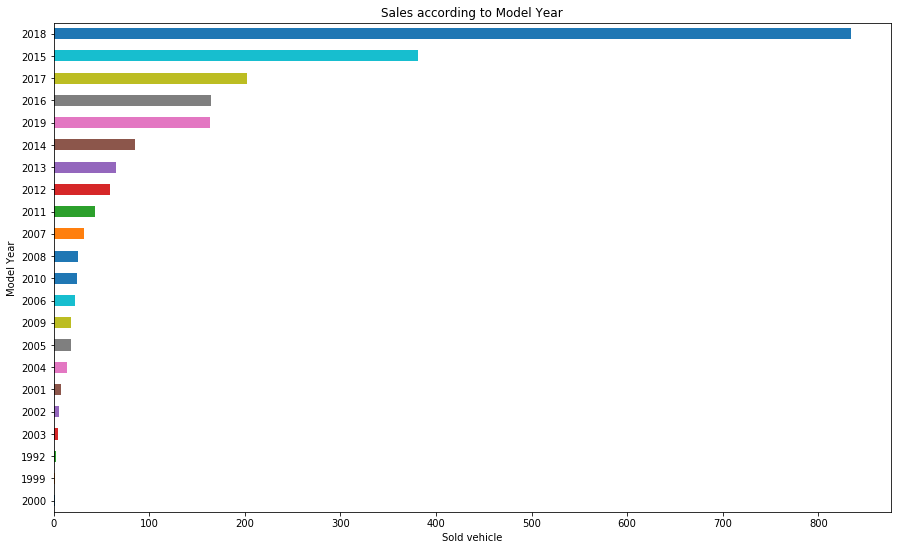

In [347]:
data['Year'].value_counts().head(25).sort_values().plot(kind='barh', figsize=(15, 9))

plt.title('Sales according to Model Year')
plt.ylabel('Model Year')
plt.xlabel('Sold vehicle')
plt.show()

In [348]:
data['Age'].describe()

count    2174.000000
mean       44.999540
std        48.331703
min         1.000000
25%        13.000000
50%        30.000000
75%        60.000000
max       503.000000
Name: Age, dtype: float64

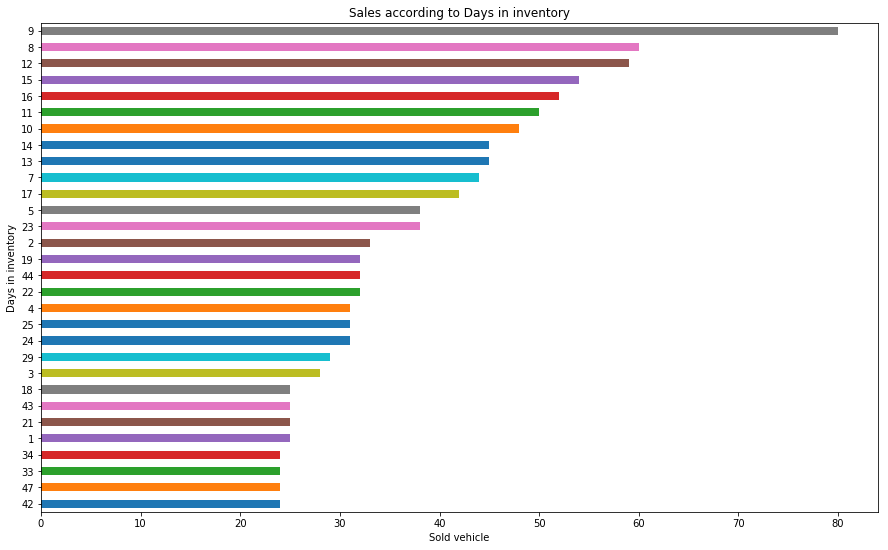

In [349]:
data['Age'].value_counts().head(30).sort_values().plot(kind='barh', figsize=(15, 9))
plt.title('Sales according to Days in inventory')
plt.ylabel('Days in inventory')
plt.xlabel('Sold vehicle')
plt.show()

In [350]:
data['Color'].describe()

count      2068
unique      226
top       Black
freq        549
Name: Color, dtype: object

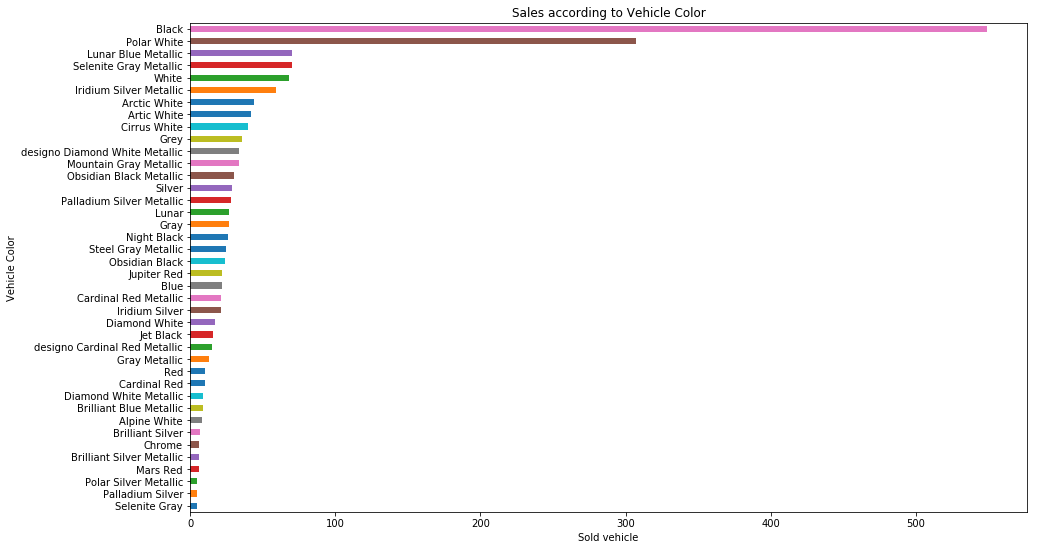

In [351]:
data['Color'].value_counts().head(40).sort_values().plot(kind='barh', figsize=(15, 9))
plt.title('Sales according to Vehicle Color')
plt.ylabel('Vehicle Color')
plt.xlabel('Sold vehicle')
plt.show()

In [352]:
data['Class'].describe()

count     2171
unique       4
top        SUV
freq      1111
Name: Class, dtype: object

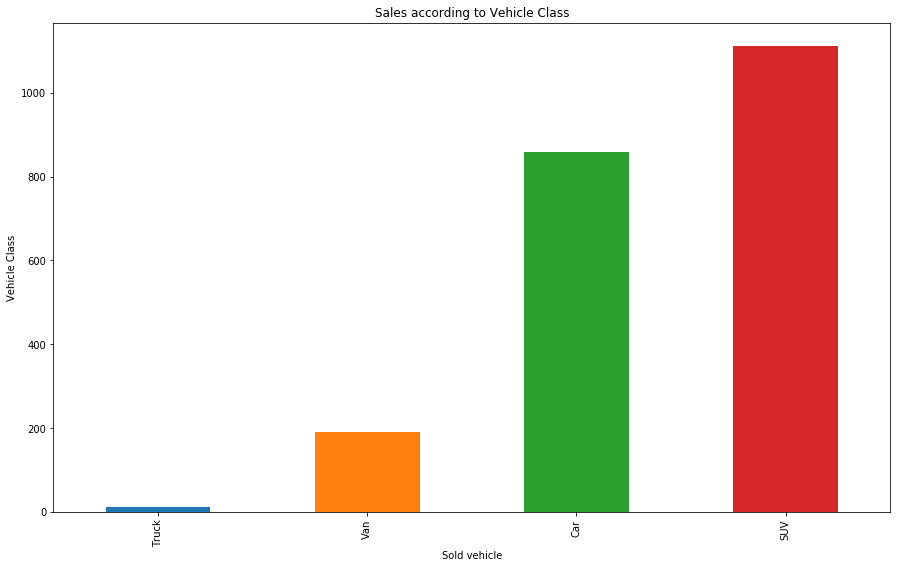

In [353]:
data['Class'].value_counts().head(40).sort_values().plot(kind='bar', figsize=(15, 9))
plt.title('Sales according to Vehicle Class')
plt.ylabel('Vehicle Class')
plt.xlabel('Sold vehicle')
plt.show()

In [354]:
data['Class_type'].describe()

count                      2171
unique                       16
top        Luxury Sport Utility
freq                        661
Name: Class_type, dtype: object

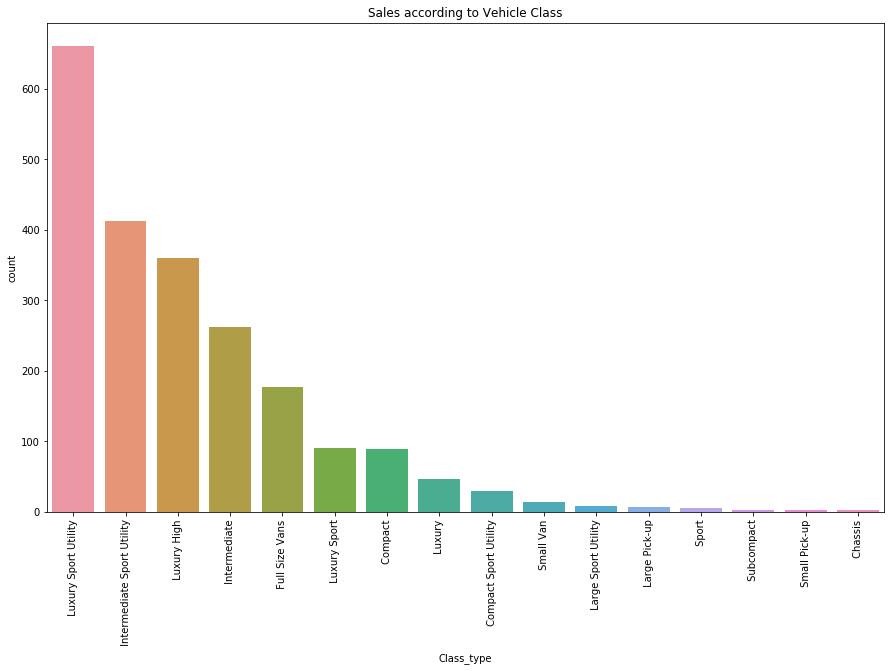

In [355]:

plt.figure(figsize=(15, 9))
plt.title('Sales according to Vehicle Class', fontsize=12)
plt.xticks(rotation=90)
sns.countplot(data['Class_type'], order = data['Class_type'].value_counts().index);

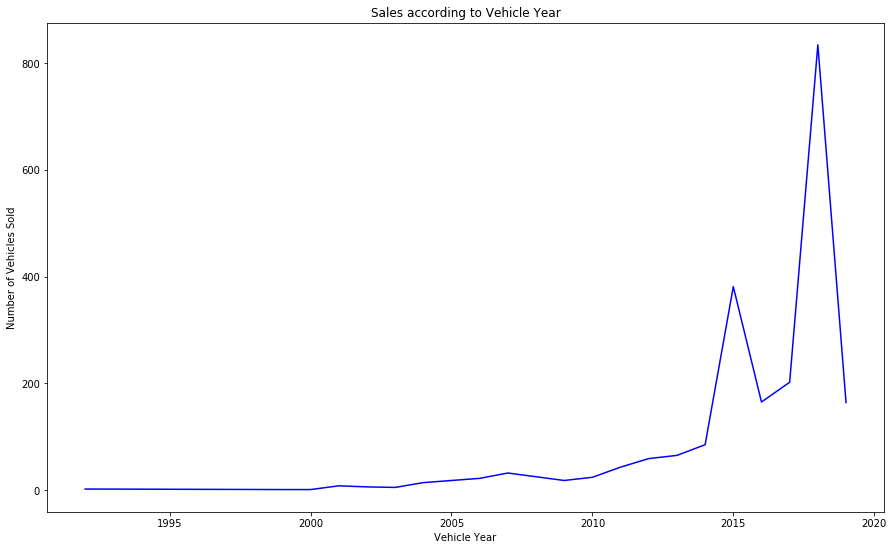

In [356]:
plt.figure(figsize=(15, 9))
plt.plot(data.groupby('Year').size(), color='blue')

plt.title('Sales according to Vehicle Year')
plt.ylabel('Number of Vehicles Sold')
plt.xlabel('Vehicle Year')
plt.show()

#### Below is a visualization of the distribution of Car Price by their Model Year.

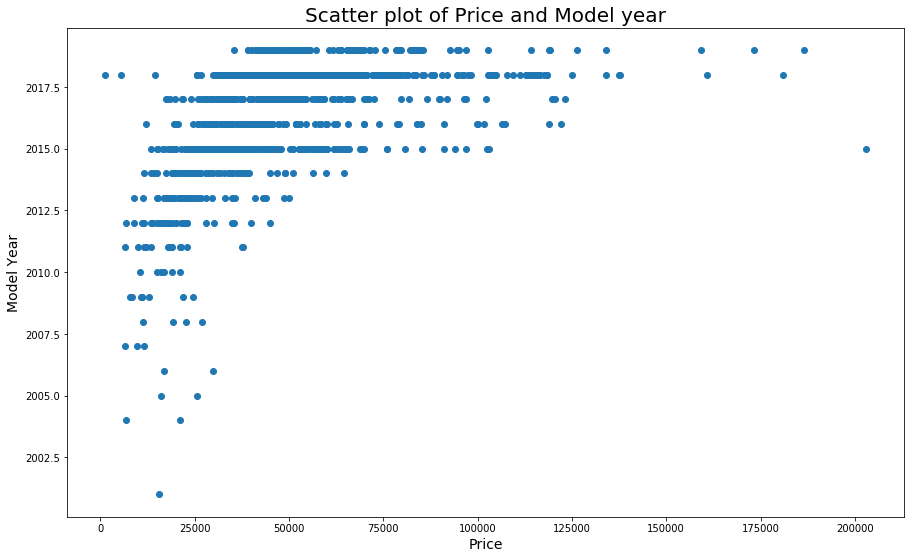

In [357]:

plt.figure(figsize=(15, 9))
# plot two values price per year_model
plt.scatter(data.Price, data.Year)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Model Year", fontsize=14)
plt.title("Scatter plot of Price and Model year",fontsize=20)
plt.show()

#### Looking to express the Cars Price according to Class Type

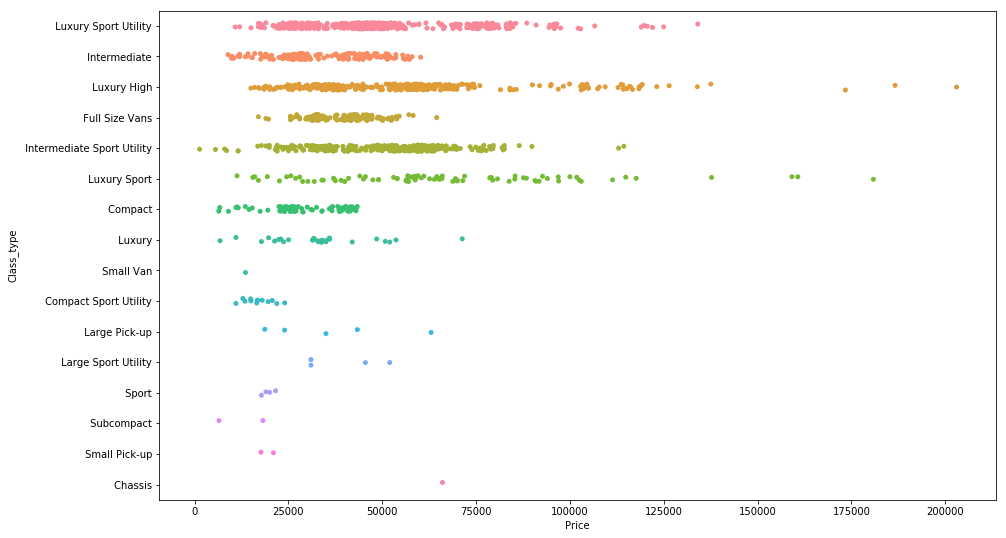

In [358]:
f, ax = plt.subplots(figsize=(15, 9))
sns.stripplot(data = data, x='Price', y='Class_type', jitter=.1)
plt.show()

#### Price Distribution by Class

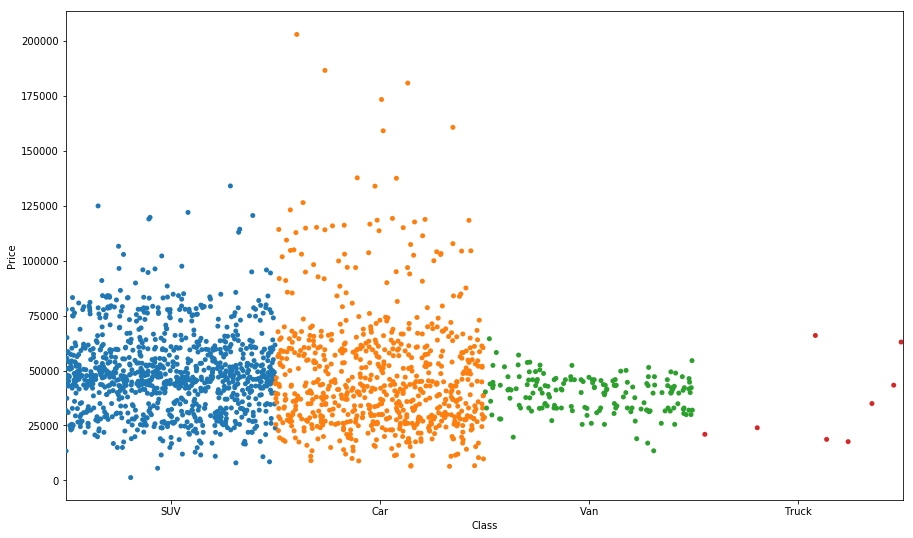

In [359]:
f, ax = plt.subplots(figsize=(15, 9))
sns.stripplot(data = data, x='Class', y='Price', jitter=.5)
plt.show()

           Red/Black    Photos      Year  Status       Age      Book  \
Red/Black        NaN       NaN       NaN     NaN       NaN       NaN   
Photos           NaN  1.000000  0.018277     NaN -0.020559  0.218191   
Year             NaN  0.018277  1.000000     NaN  0.269829  0.665608   
Status           NaN       NaN       NaN     NaN       NaN       NaN   
Age              NaN -0.020559  0.269829     NaN  1.000000  0.242258   
Book             NaN  0.218191  0.665608     NaN  0.242258  1.000000   
Cost             NaN  0.155578  0.638435     NaN  0.269883  0.930384   
Odometer         NaN  0.063982 -0.870521     NaN -0.281560 -0.652153   
Overall          NaN  0.013137  0.270855     NaN  0.064688  0.149507   
Like Mine        NaN  0.109296  0.185543     NaN  0.048154  0.072955   

               Cost  Odometer   Overall  Like Mine  
Red/Black       NaN       NaN       NaN        NaN  
Photos     0.155578  0.063982  0.013137   0.109296  
Year       0.638435 -0.870521  0.270855   0.1855

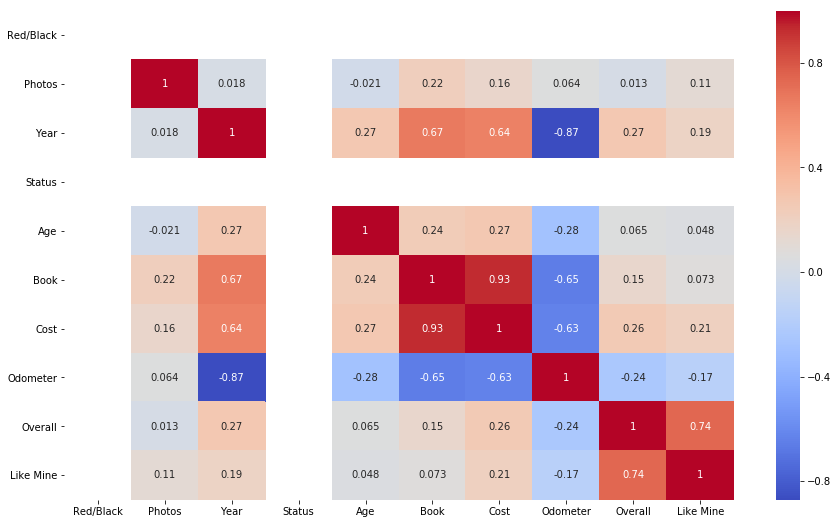

In [360]:
plt.figure(figsize=(15,9))
data1 = data.drop('Price',1)
corrmat = data1.corr()
print(corrmat)

sns.heatmap(corrmat, cmap='coolwarm', annot=True)


 It is important to understand possible correlations in your data, especially when building a regression model. Strongly correlated predictors, phenomenon referred to as multicollinearity, will cause coefficient estimates to be less reliable.
 As we see above, Cost and book are highly correlated, as well as Overall and Like Mine. There are  no values for Status and Red/Black.

In [361]:
# Lets do some Feature engineering by dropping columns that do not have any impact towards vehicle pricing.
# Often, it is better to train your model with only significant features than to train it with all the features, 
# including unnecessary ones.

columns_to_drop = ['Red/Black', 'Deleted Date', 'Status', 'VIN', 'Recall Status','Disp', 'Book', 'Overall', 'Like Mine', 'Photos']
data.drop(labels=columns_to_drop, axis=1, inplace=True)
data.head()

,Carfax Has Report,Carfax Has Manufacturer Recall,Carfax Has Warnings,Carfax Has Problems,Year,Vehicle,Class,Class_type,Certified,Age,Body,Color,Price,Cost,Odometer
0,NaN,NaN,NaN,NaN,2018,Mercedes-Benz GLS 450 4MATIC®,SUV,Luxury Sport Utility,NaN,1,4D Sport Utility,Obsidian Black,76164.0,76514.0,45.0
1,Yes,NaN,NaN,NaN,2015,Mercedes-Benz C-Class C 300 4MATIC®,Car,Intermediate,Yes,1,4D Sedan,Polar White,NaN,NaN,47525.0
2,NaN,NaN,NaN,NaN,2018,Mercedes-Benz S-Class S 450 4MATIC®,Car,Luxury High,NaN,1,4D Sedan,Gray Metallic,116148.0,NaN,42.0
3,NaN,NaN,NaN,NaN,2017,Mercedes-Benz Sprinter 3500,Van,Full Size Vans,NaN,1,3D Cargo Van,Arctic White,49526.0,NaN,5.0
4,NaN,NaN,NaN,NaN,2014,Mercedes-Benz M-Class ML 350 4MATIC®,SUV,Intermediate Sport Utility,NaN,1,4D Sport Utility,Brown,25117.0,NaN,45642.0


In [362]:
# Now lets drop missing values for these important features since they missing values can not be assumed

data = data.dropna(subset=['Price','Odometer','Color','Cost']) #Drop null values
data.describe()

,Year,Age,Price,Cost,Odometer
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000
mean,2016.602326,50.830233,46832.894767,45905.759302,15312.886628
std,2.054520,44.024799,20789.211542,21044.399419,20456.400584
min,2001.000000,1.000000,1302.000000,-775.000000,3.000000
25%,2015.000000,19.000000,31999.000000,32006.750000,12.000000
50%,2017.000000,40.000000,44548.000000,45269.000000,4454.500000
75%,2018.000000,67.000000,56801.000000,56499.500000,28263.750000
max,2019.000000,310.000000,203000.000000,205250.000000,132218.000000


Lets visualize pairwise relationships in the dataset. It creates a matrix of axes and shows the realtionship for each pair of columns in our dataset. This also allows us to note outliers.

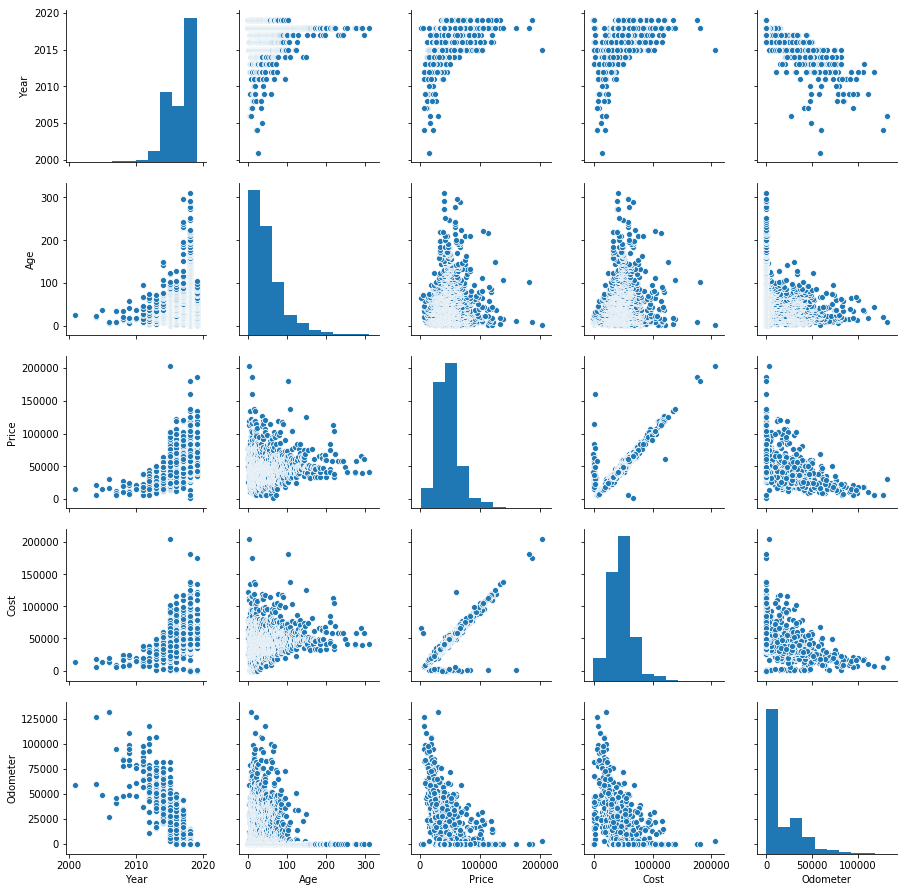

In [363]:
sns.pairplot(data);

From the visualization, you can see there is no evidence of extreme outliers. 
You can see the vehicles with the highest price have lower odometer readings and are the newer model year vehicles.

C:\Users\femis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


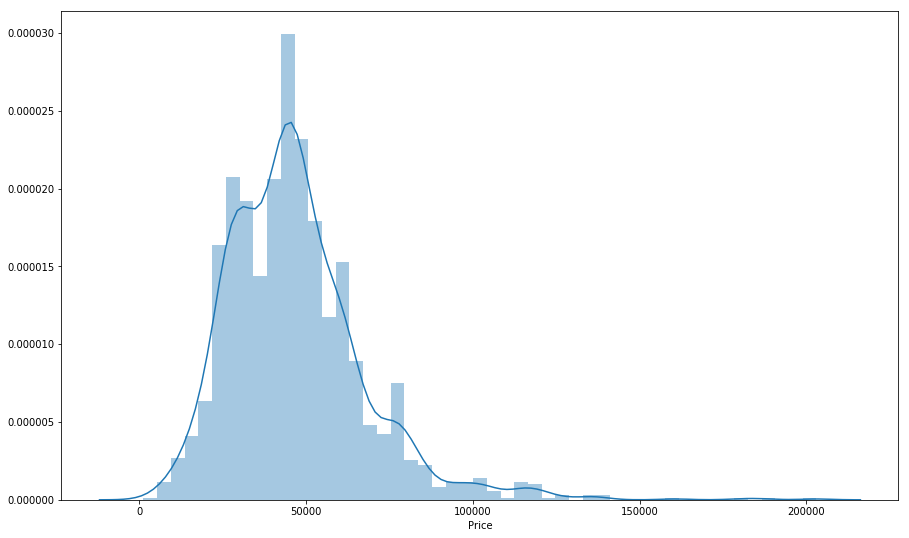

In [364]:
plt.figure(figsize=(15, 9))
sns.distplot(data['Price'])

In [365]:
# Lets turn the categorical features into numeric fields
data = pd.get_dummies(data)
data.head()

,Year,Age,Price,Cost,Odometer,Carfax Has Report_Yes,Carfax Has Manufacturer Recall_Yes,Carfax Has Warnings_Yes,Carfax Has Problems_Yes,Vehicle_Acura MDX 3.5L SH-AWD w/Advance Package,...,Color_designo Magno Alanite Gray (Matte Finish),Color_designo Magno Night Black,Color_designo Magno Platinum (Matte Finish),Color_designo Magno Selenite Gray,Color_designo Mocha Black,Color_designo Mocha Black Metallic,Color_designo Mountain Gray Magno,Color_designo Mystic White Metallic,Color_designo Selenite Gray,Color_designo Shadow Gray Magno
0,2018,1,76164.0,76514.0,45.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,2018,2,62479.0,63004.0,41.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,2018,2,50347.0,50697.0,35.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2018,2,77897.0,78247.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2018,2,25510.0,25860.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
data.describe()

,Year,Age,Price,Cost,Odometer,Carfax Has Report_Yes,Carfax Has Manufacturer Recall_Yes,Carfax Has Warnings_Yes,Carfax Has Problems_Yes,Vehicle_Acura MDX 3.5L SH-AWD w/Advance Package,...,Color_designo Magno Alanite Gray (Matte Finish),Color_designo Magno Night Black,Color_designo Magno Platinum (Matte Finish),Color_designo Magno Selenite Gray,Color_designo Mocha Black,Color_designo Mocha Black Metallic,Color_designo Mountain Gray Magno,Color_designo Mystic White Metallic,Color_designo Selenite Gray,Color_designo Shadow Gray Magno
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,...,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000
mean,2016.602326,50.830233,46832.894767,45905.759302,15312.886628,0.156395,0.004070,0.008721,0.008721,0.000581,...,0.001163,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581
std,2.054520,44.024799,20789.211542,21044.399419,20456.400584,0.363335,0.063683,0.093005,0.093005,0.024112,...,0.034090,0.024112,0.024112,0.024112,0.024112,0.024112,0.024112,0.024112,0.024112,0.024112
min,2001.000000,1.000000,1302.000000,-775.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,19.000000,31999.000000,32006.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,40.000000,44548.000000,45269.000000,4454.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,67.000000,56801.000000,56499.500000,28263.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,310.000000,203000.000000,205250.000000,132218.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data

In [368]:
#Create a new column that for each row, generates a random number between 0 and 1, and
#if that value is less than or equal to .75, then sets the value of that cell as True
#and false otherwise. This is a quick and dirty way of randomly assigning some rows to
#be used as the training data and some as the test data.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= .75

#Create two new dataframes, one with the training rows, one with the test rows

train, test = data[data['is_train']==True], data[data['is_train']==False]

#Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 1302
Number of observations in the test data: 418


#### Target Variable Analysis: Is it Normal?

C:\Users\femis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


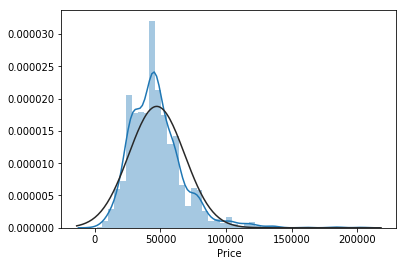

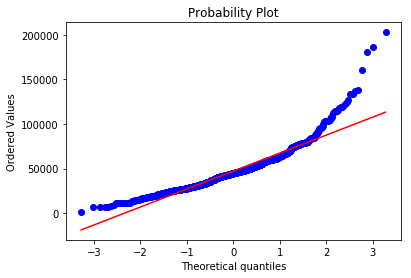

In [369]:
#histogram and normal probability plot to view the Target variable = Price
from scipy.stats import norm

sns.distplot(train['Price'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)


The variable is certainly not normal: Let's apply a log transform on the data and see what happens...

C:\Users\femis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


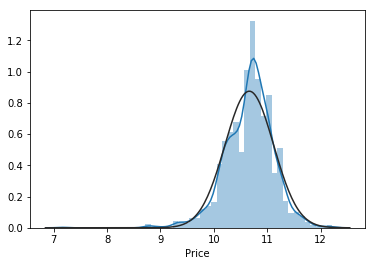

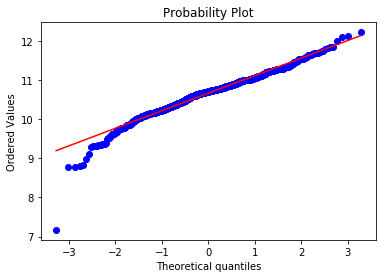

In [370]:
train['Price'] = np.log(train['Price'])
sns.distplot(train['Price'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)

The variable looks much better now.

Normalizing the features will hopefully improve the regressions. We just have to remember to transform the output data back using an exponentiation at the end of the model.

## A Random Tree Regressor

To start off, let's try to train a simple model with a few of the features. Those features are:

Year, Age and Odometer

We will go for a very simple decision tree regression first. We can test for performance and overfitting using k-fold validation; here we take  k=10 . First, we take the data and make it useful...

In [371]:
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...

X = train[['Year','Age','Cost','Odometer']]
Y = train[['Price']]

# and the data for the competition submission...
X_test = test[['Year','Age','Cost','Odometer']]
print(X.head())
print(Y.head())

    Year  Age     Cost  Odometer
0   2018    1  76514.0      45.0
28  2018    2  63004.0      41.0
31  2018    2  50697.0      35.0
33  2018    2  78247.0       9.0
47  2018    2  51350.0      18.0
        Price
0   11.240644
28  11.042586
31  10.826694
33  11.263143
47  10.836458


Now lets use cross validation to see how well a proposed regression model performs.


### Explained Variance

In [372]:
# let's set up some cross-validation analysis to evaluate our model and later models...

from sklearn.model_selection import cross_val_score

# try fitting a decision tree regression model...
 # declare the regression model form. Let the depth be default.
DTR_1 = dtr(max_depth=None)

# fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [0.91274071 0.87429349 0.87643702 0.95128801 0.93924753 0.95147265
 0.96283879 0.5172516  0.96503576 0.96001966]
Est. explained variance: 0.89 (+/- 0.26)


For explained variance, the best possible result is 1. Values below 1 indicate error in the regression.

Let's use a random forest regressor instead. We will consider forests with varying numbers of trees (estimators), each of which provides a weak regression solution that can be averaged to get the overall regression output.

In [373]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['Price']] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: 0.90 (+/- 0.26)

estimators: 5
Est. explained variance: 0.89 (+/- 0.26)

estimators: 10
Est. explained variance: 0.91 (+/- 0.26)

estimators: 15
Est. explained variance: 0.91 (+/- 0.26)

estimators: 20
Est. explained variance: 0.92 (+/- 0.26)

estimators: 25
Est. explained variance: 0.91 (+/- 0.26)

estimators: 30
Est. explained variance: 0.91 (+/- 0.27)

estimators: 35
Est. explained variance: 0.92 (+/- 0.26)

estimators: 40
Est. explained variance: 0.91 (+/- 0.26)

estimators: 45
Est. explained variance: 0.91 (+/- 0.26)

estimators: 50
Est. explained variance: 0.92 (+/- 0.26)

estimators: 55
Est. explained variance: 0.92 (+/- 0.26)

estimators: 60
Est. explained variance: 0.91 (+/- 0.27)

estimators: 65
Est. explained variance: 0.92 (+/- 0.26)

estimators: 70
Est. explained variance: 0.91 (+/- 0.26)

estimators: 75
Est. explained variance: 0.92 (+/- 0.26)

estimators: 80
Est. explained variance: 0.92 (+/- 0.26)



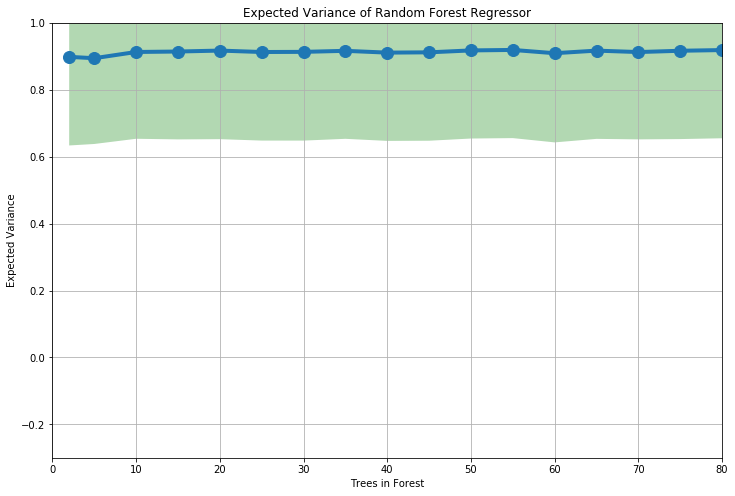

In [374]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

The results are acceptable. 

Lets try using more features if there would be a difference. 

## Feature Ranking

A mutual information regression for feature ranking and selection will be used. This metric measures the dependence between two random variables, in this case each feature in the data set and the Price regression target. 

Note that this doesn't consider combinations of feature values

In [375]:
included_features = [col for col in list(train)
                    if len([i for i in train[col].T.notnull() if i == True])==1302
                    and col!='Price']

X = train[included_features] # the feature data
Y = train[['Price']] # the target
yt = [i for i in Y['Price']] # the target list 
# and the data for the test...
X_test = test[included_features]

X.head()

,Year,Age,Cost,Odometer,Carfax Has Report_Yes,Carfax Has Manufacturer Recall_Yes,Carfax Has Warnings_Yes,Carfax Has Problems_Yes,Vehicle_Acura MDX 3.5L SH-AWD w/Advance Package,Vehicle_Acura MDX 3.5L w/Technology & Entertainment Pkgs,...,Color_designo Magno Night Black,Color_designo Magno Platinum (Matte Finish),Color_designo Magno Selenite Gray,Color_designo Mocha Black,Color_designo Mocha Black Metallic,Color_designo Mountain Gray Magno,Color_designo Mystic White Metallic,Color_designo Selenite Gray,Color_designo Shadow Gray Magno,is_train
0,2018,1,76514.0,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
28,2018,2,63004.0,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
31,2018,2,50697.0,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
33,2018,2,78247.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
47,2018,2,51350.0,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


##### Mutual Information Regression Metric for Feature Ranking

We will use mutual information regression for feature ranking and selection. This metric measures the dependence between two random variables, in this case each feature in the data set and the Price regression target. 

In [376]:
import sklearn.feature_selection as fs

mir_result = fs.mutual_info_regression(X, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))

[['Cost' '2.513674092717023']
 ['Odometer' '0.49362112924268287']
 ['Year' '0.4654632289371934']
 ['Vehicle_Mercedes-Benz GLC 300 4MATIC®' '0.21016044454635474']
 ['Vehicle_Mercedes-Benz GLE 350 4MATIC®' '0.14945516152602356']
 ['Class_type_ Luxury Sport Utility' '0.14348095833780894']
 ['Certified_Yes' '0.13093289868785418']
 ['Vehicle_Mercedes-Benz GLS 450 4MATIC®' '0.12837635294044125']
 ['Class_type_ Full Size Vans' '0.10176353607005462']
 ['Class_Van' '0.09996731415604754']
 ['Class_type_ Intermediate Sport Utility' '0.08867553257504279']
 ['Body_3D Cargo Van' '0.08446905665685578']
 ['Class_SUV' '0.08164474181731185']
 ['Body_4D Sport Utility' '0.0816277200763742']
 ['Vehicle_Mercedes-Benz E-Class E 300 4MATIC®' '0.07296436588669519']
 ['Age' '0.06924896594568963']
 ['Class_Car' '0.06903145637116403']
 ['Class_type_ Luxury High' '0.06221458013020387']
 ['Vehicle_Mercedes-Benz GLA 250 4MATIC®' '0.061455434151635124']
 ['Body_4D Sedan' '0.048251783920721936']
 ['Class_type_ Compact

Obviously, it determined that Cost, vehicle, odometer, year and Class type are the top 5 features. These seem like fairly intuitve results, at least for somebody with a distant notion of what matters when pricing a vehicle.

Let's plot the results next to each other for a better visualization...

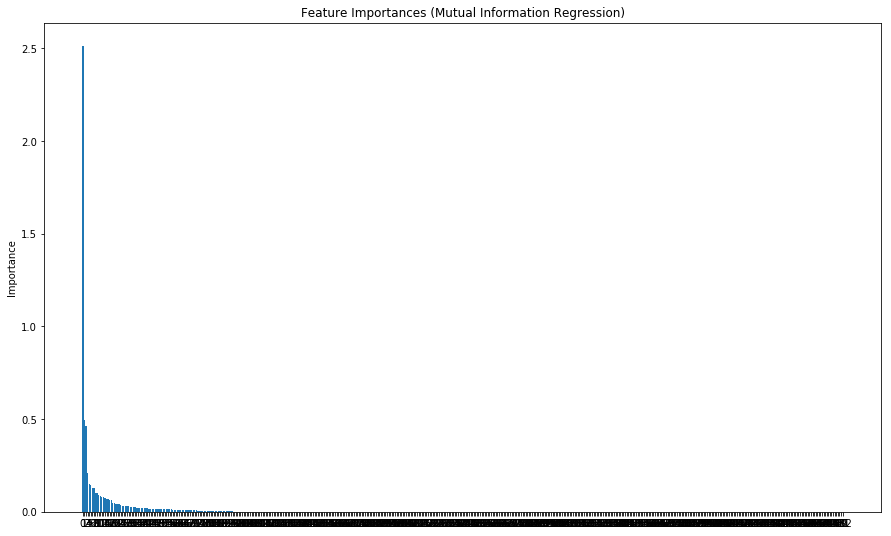

In [377]:
# and plot...
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
ind = np.arange(len(included_features))
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')

plt.show()

In [378]:
train.shape

(1302, 484)

## Feature Pruning

Let's take the top 50, 100, 150 and 200 features to train the random forest regressor model we've been working with. We will wrap the necessary model building and plotting code in functions first.

In [379]:
# define a function to do the necessary model building....
def getModel(sorted_scores,train,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures] # ordered list of important features
    # define the training data X...
    X = train[included_features]
    Y = train[['Price']]
   
    # define the number of estimators to consider
    estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
    mean_rfrs = []
    std_rfrs_upper = []
    std_rfrs_lower = []
    yt = [i for i in Y['Price']]
    np.random.seed(11111)
    
    # for each number of estimators, fit the model and find the results for 8-fold cross validation
    for i in estimators:
        model = rfr(n_estimators=i,max_depth=None)
        scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
        mean_rfrs.append(scores_rfr.mean())
        std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
        std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    return mean_rfrs,std_rfrs_upper,std_rfrs_lower

# define a function to plot the model expected variance results...
def plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,numFeatures):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(estimators,mean_rfrs,marker='o',
           linewidth=4,markersize=12)
    ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                    facecolor='green',alpha=0.3,interpolate=True)
    ax.set_ylim([-.2,1])
    ax.set_xlim([0,80])
    plt.title('Expected Variance of Random Forest Regressor: Top %d Features'%numFeatures)
    plt.ylabel('Expected Variance')
    plt.xlabel('Trees in Forest')
    plt.grid()
    plt.show()
    return

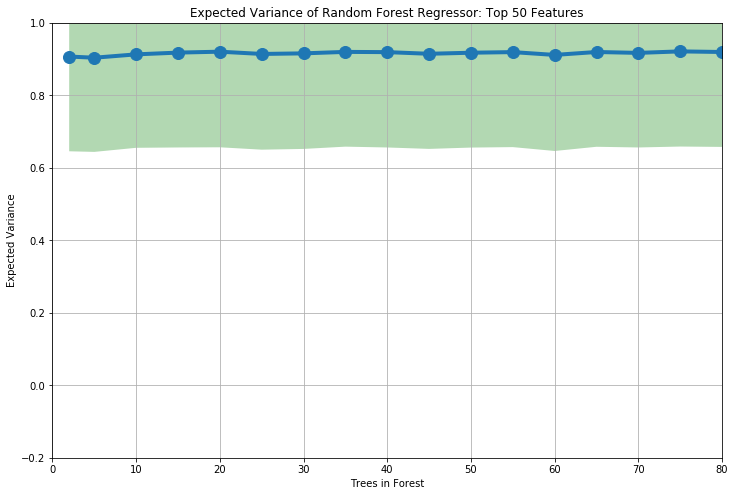

In [380]:
# and let's run the regression model fitting for each of the scenarios listed before...
# top 50 features
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,50)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,50)

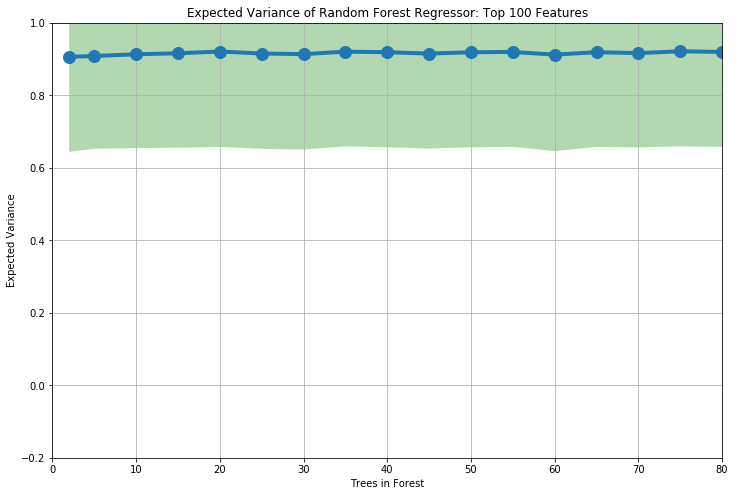

In [381]:
# and let's run the regression model fitting for each of the scenarios listed before...
# top 100 features
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,100)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,100)

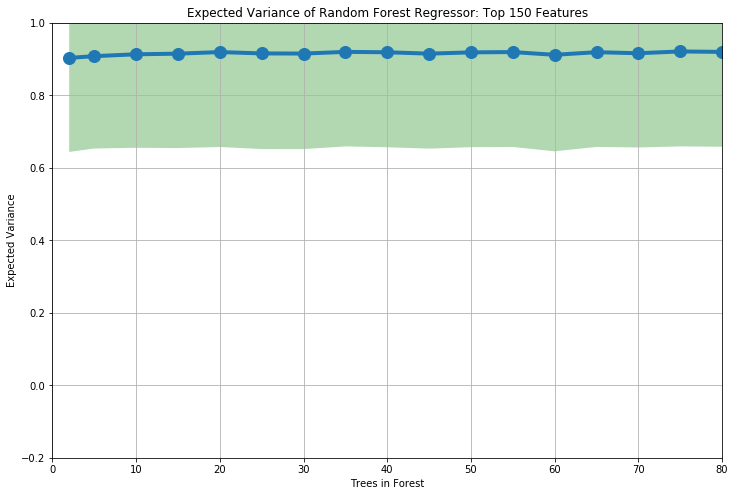

In [382]:
# top 150 features
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,150)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,150)

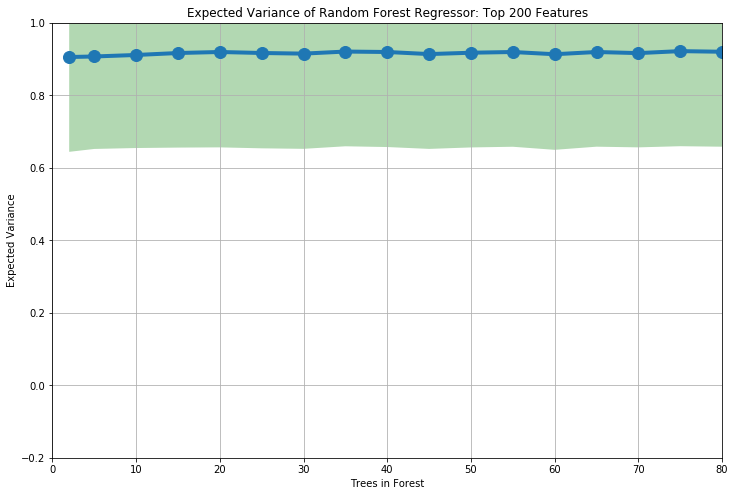

In [383]:
# top 200 features

mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,200)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,200)

#### Random Forest Regression Impressions

It seems like the mean expected variance of the regressions stops improving at around 100 features. The deviation in the expected variance score decreases with increasing features, which is intuitive. The 150-feature and 200-feature results look almost identical, probably because the features are beginning to be insignificant. Let's only consider the top 100 features from here on out.

## Building the Output 

Now, let's take the best regression model we have and build the prediction output. For this model, we have:

A random forest resgression model, incorporating
the 100 most prominent features according to an MIR analysis, and
100 regressor trees per forest, and
the default sklearn settings for the rest of the model parameters.
So let's apply this model to the test data and generate the submission!

In [384]:
# build the model with the desired parameters...
numFeatures = 100 # the number of features to inlcude
trees = 100 # trees in the forest
included_features = np.array(sorted_scores)[:,0][:numFeatures]
# define the training data X...
X = train[included_features]
Y = train[['Price']]
# transform categorical data if included in X...
for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
yt = [i for i in Y['Price']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(X,yt)

explained variance scores for k=10 fold validation: [0.9434265  0.90321735 0.94589638 0.98120699 0.98082264 0.97089864
 0.98713038 0.53367369 0.97895275 0.97145096]
Est. explained variance: 0.92 (+/- 0.26)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

##### The explained variance with the top 100 feature selection is slightly better than the simple feature selection in the first model

In [385]:
# apply the model to the test data and get the output...

X_test = test[included_features]
# for col in list(X_test):
   # if X_test[col].dtype=='object':
      #  X_test = getObjectFeature(X_test, col, datalength=440)
# print(X_test.head(20))
y_output = model.predict(X_test.fillna(0)) # get the results and fill nan's with 0
print(y_output)

[10.20288951 11.1098845  11.27476247 10.613403   11.02980999 10.82989474
 10.36787285 10.40291664 10.66397638 10.9814766  11.27971609 10.42932844
 11.28237167 10.4272529  10.95729207 10.81932505 11.52082301 10.88847788
 10.80180224 10.27875295 10.5175694  10.14328043 10.71601961 10.75443587
 11.07037294 10.24513359 10.2127982  10.20198943 10.00216025 10.84052184
 10.24238159  9.47290421 10.3633731   9.91669954 10.97437297 11.04528181
 11.68073469 10.71957049 10.73237052 11.05889496 10.46141724 10.22806483
 10.43714389 10.80236551 10.68481017 10.76518316 10.4188083   9.99212869
 10.97921479 10.38850297 10.11238826  9.75875659 11.21013009 10.17636494
 10.22933957 10.98574416 10.96706768  9.91686282 10.89742758 10.23168242
 10.76494616 10.73386376 10.23328381 11.04994026  9.08965149 10.62851525
 10.51681298 10.86156545 10.71676382 10.15934737  9.35807367 10.31593605
  9.77572155 10.84649708 10.69193423 10.98123673 10.12340416 10.69249707
 10.53398837 10.21084233 10.411544   10.30327164 10

In [386]:
# transform the data 

y_output = np.exp(y_output)
print(y_output)

[ 26981.0355376   66828.47217599  78807.42305632  40676.38560917
  61685.85847993  50508.38997451  31820.71741238  32955.60523554
  42786.43433578  58775.27785186  79198.77374548  33837.61879399
  79409.37123748  33767.46030056  57370.87604143  49977.34341443
 100792.8812588   53555.7198386   49109.22822312  29107.55228379
  36959.18215259  25419.71749508  45072.14077143  46837.33251939
  64239.45967805  28145.24172921  27249.71125646  26956.7613875
  22074.09994764  51048.01012892  28067.89260366  13002.59466044
  31677.85377725  20265.9929505   58359.23951829  62647.67274666
 118271.09562002  45232.47096387  45815.16913825  63506.33630012
  34941.03633319  27668.91415497  34103.1110273   49136.89755432
  43687.18850504  47343.42152951  33483.50813755  21853.7691375
  58642.48936518  32484.00091127  24646.45254664  17305.10099211
  73875.02513831  26274.78305523  27704.20734138  59026.640826
  57934.46192319  20269.30235124  54037.17842798  27769.19033605
  47332.20264311  45883.63329

In [387]:
# define the data frame for the results

Price = pd.DataFrame(y_output, columns=['Pred_Price'])

Test_ = test[['Price','Cost','Odometer', 'Year', 'Age']]
test_data = pd.DataFrame(Test_.reset_index(drop=True))

results = pd.concat([Price['Pred_Price'], test_data],axis=1)
results.head()

,Pred_Price,Price,Cost,Odometer,Year,Age
0,26981.035538,25510.0,25860.0,15.0,2018,2
1,66828.472176,68788.0,67589.0,59027.0,2015,3
2,78807.423056,78242.0,78592.0,8.0,2018,3
3,40676.385609,36048.0,36398.0,12.0,2018,3
4,61685.858480,61315.0,61665.0,9.0,2018,4


No handles with labels found to put in legend.


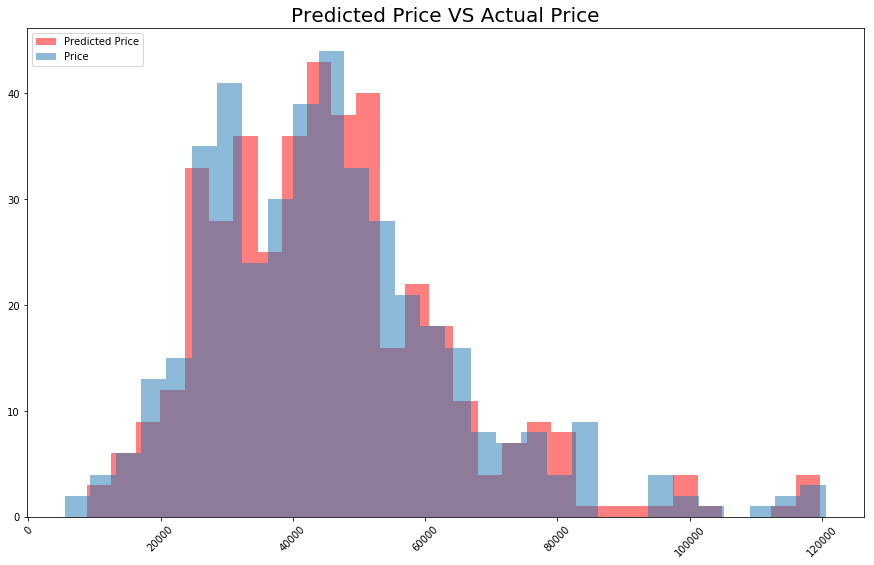

In [388]:
plt.figure(figsize=(15, 9))
plt.title('Predicted Price VS Actual Price', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.hist(results['Pred_Price'], alpha=0.5, bins=30, label='Predicted Price', color='red')
plt.hist(results['Price'], alpha=0.5, bins=30, label='Price')
plt.legend(loc='upper left')
plt.show()

### Conclusion

The predicted price in the model was pretty close to the actual test dataset when I did the feature ranking of the dataset set turned into a binary classification. The best performing model was the random forest with 100 features and 100 trees, with an acuracy of 92%.

I believe the model can serve as a good pricing tool for the dealership because it follows in the dealership current pattern of pricing based on the recently sold inventory.

For this modeling, I chose the random forest regression model because it combines multiple decisions tress in determining the final output rather than relying on individual trees which i feel is perfect to create the model.

There were a few issues with the data, there was alot of missing values in multiple fields which ended up causing a reduction in the data size when some of the fields and rows were dropped. Filling in the missing values in some of the fields would have skewed the data, which would affect the model. I believe if i created a model based on sold vehicle dataset from several other dealerships in the area, the model would be more robust and produce a more accurate predictive model.

In [389]:
# and write to output
results.to_csv('Vehicle_Price_Model.csv', index = False)